In [ ]:
import pandas as pd
df = pd.read_csv('bbc-news-data.csv', sep='\t')
df = df.drop(columns=['filename'])

In [ ]:
# df = df.dropna()


In [ ]:
# df.to_csv('cleaned_dataa.csv', index=False)
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   title     2225 non-null   object
 2   content   2225 non-null   object
dtypes: object(3)
memory usage: 52.3+ KB


In [ ]:
df.head()

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [ ]:
df.to_csv('imdb_movies_no_stopwords.csv', index=False)


In [ ]:
category = pd.get_dummies(df.category)
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,title,content,business,entertainment,politics,sport,tech
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...
2220,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


In [ ]:


sinopsis = df_baru['title'].values + '' + df_baru['content'].values
label = df_baru[['business', 'entertainment', 'politics', 'sport', 'tech']].values

In [ ]:
sinopsis

array(['Ad sales boost Time Warner profit Quarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.  The firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.  Time Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [ ]:
from sklearn.model_selection import train_test_split
sinopsis_latih, sinopsis_test, label_latih, label_test = train_test_split(sinopsis, label, test_size=0.2, shuffle=True)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x', filters='!"#$%&()*+,-./:;<=>@[\]^_`{|}~ ')
tokenizer.fit_on_texts(sinopsis_latih)
tokenizer.fit_on_texts(sinopsis_test)

sekuens_latih = tokenizer.texts_to_sequences(sinopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sinopsis_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim= len(tokenizer.word_index) + 1, output_dim=64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])



In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [ ]:
num_epochs = 50
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test),  callbacks=[callbacks], verbose=2, batch_size=128)

Epoch 1/50
14/14 - 152s - loss: 1.6066 - accuracy: 0.2348 - val_loss: 1.5975 - val_accuracy: 0.2562 - 152s/epoch - 11s/step
Epoch 2/50
14/14 - 147s - loss: 1.5797 - accuracy: 0.2713 - val_loss: 1.4784 - val_accuracy: 0.2831 - 147s/epoch - 11s/step
Epoch 3/50
14/14 - 144s - loss: 1.5120 - accuracy: 0.4427 - val_loss: 1.4811 - val_accuracy: 0.4854 - 144s/epoch - 10s/step
Epoch 4/50
14/14 - 145s - loss: 1.3748 - accuracy: 0.4725 - val_loss: 1.2583 - val_accuracy: 0.5011 - 145s/epoch - 10s/step
Epoch 5/50
14/14 - 145s - loss: 1.0933 - accuracy: 0.4994 - val_loss: 1.1077 - val_accuracy: 0.5191 - 145s/epoch - 10s/step
Epoch 6/50
14/14 - 145s - loss: 0.8990 - accuracy: 0.5848 - val_loss: 0.9665 - val_accuracy: 0.6045 - 145s/epoch - 10s/step
Epoch 7/50
14/14 - 145s - loss: 0.6679 - accuracy: 0.6640 - val_loss: 0.7781 - val_accuracy: 0.6809 - 145s/epoch - 10s/step
Epoch 8/50
14/14 - 148s - loss: 0.5202 - accuracy: 0.7584 - val_loss: 0.7069 - val_accuracy: 0.7169 - 148s/epoch - 11s/step
Epoch 9/

In [ ]:
import matplotlib.pyplot as plt


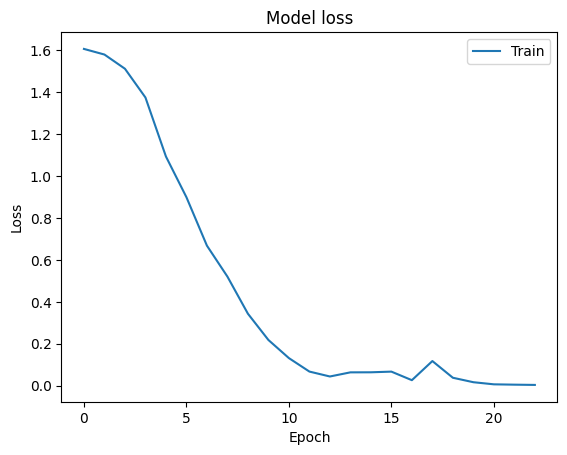

In [ ]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

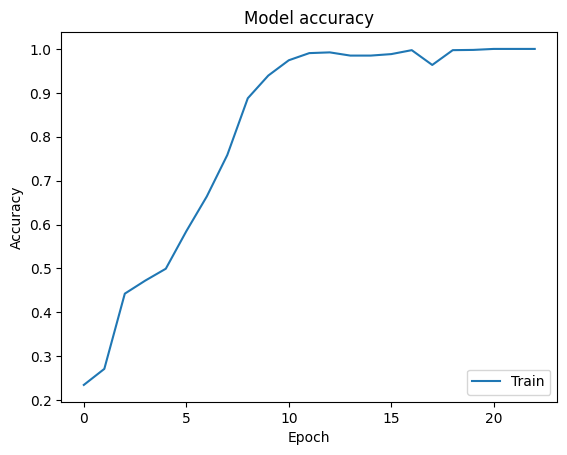

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

In [ ]:
model.save('my_model.keras')


In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          2091136   
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 645       
                                                                 
Total params: 2133125 (8.14 MB)
Trainable params: 2133125 (8.14 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
